In [ ]:
import pandas as pd
import numpy as np
from google.colab import files
dataset = pd.read_csv("dataset.csv")
dataset

,JENIS KELAMIN,STATUS MAHASISWA,STATUS PERNIKAHAN,IPK SEMESTER 1-6,STATUS KELULUSAN
0,LAKI-LAKI,MAHASISWA,BELUM,2.11,TEPAT
1,LAKI-LAKI,BEKERJA,BELUM,3.45,TEPAT
2,PEREMPUAN,MAHASISWA,BELUM,3.01,TEPAT
3,PEREMPUAN,MAHASISWA,MENIKAH,2.34,TEPAT
4,LAKI-LAKI,BEKERJA,MENIKAH,3.99,TEPAT
...,...,...,...,...,...
87,by,MAHASISWA,MENIKAH,3.25,TEPAT
88,LAKI-LAKI,MAHASISWA,dd,1.00,TERLAMBAT
89,PEREMPUAN,NaN,BELUM,3.99,TERLAMBAT
90,PEREMPUAN,MAHASISWA,BELUM,3.65,TEPAT


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   JENIS KELAMIN      85 non-null     object 
 1   STATUS MAHASISWA   80 non-null     object 
 2   STATUS PERNIKAHAN  89 non-null     object 
 3   IPK SEMESTER 1-6   90 non-null     float64
 4   STATUS KELULUSAN   90 non-null     object 
dtypes: float64(1), object(4)
memory usage: 3.7+ KB


In [ ]:
dataset.isnull().sum()

,0
JENIS KELAMIN,7
STATUS MAHASISWA,12
STATUS PERNIKAHAN,3
IPK SEMESTER 1-6,2
STATUS KELULUSAN,2


In [ ]:
dataset_clean=dataset.dropna()

# Tampilkan jumlah nilai null setelah dibersihkan
print("\nJumlah nilai null setelah dibersihkan:")
dataset_clean.isnull().sum()


Jumlah nilai null setelah dibersihkan:


,0
JENIS KELAMIN,0
STATUS MAHASISWA,0
STATUS PERNIKAHAN,0
IPK SEMESTER 1-6,0
STATUS KELULUSAN,0


In [ ]:
# Salin dataframe untuk dibersihkan dari noise
# df_cleaned = df.copy()

# 1. Hapus data dengan IPK yang tidak wajar (misalnya di luar rentang 0.0 - 4.0)
dataset_clean = dataset_clean[(dataset_clean['IPK SEMESTER 1-6'] >= 0.0) & (dataset_clean['IPK SEMESTER 1-6'] <= 4.0)]

# 2. Standarisasi ejaan kolom kategorikal (strip whitespace dan kapitalisasi seragam)
dataset_clean['JENIS KELAMIN'] = dataset_clean['JENIS KELAMIN'].str.strip().str.upper()
dataset_clean['STATUS MAHASISWA'] = dataset_clean['STATUS MAHASISWA'].str.strip().str.upper()
dataset_clean['STATUS PERNIKAHAN'] = dataset_clean['STATUS PERNIKAHAN'].str.strip().str.upper()
dataset_clean['STATUS KELULUSAN'] = dataset_clean['STATUS KELULUSAN'].str.strip().str.upper()

# 3. Hapus entri dengan nilai kategori di luar daftar valid
valid_gender = ['LAKI-LAKI', 'PEREMPUAN']
valid_status_mahasiswa = ['MAHASISWA', 'BEKERJA']
valid_status_pernikahan = ['MENIKAH', 'BELUM']
valid_status_kelulusan = ['TEPAT', 'TERLAMBAT']

dataset_clean = dataset_clean[
    dataset_clean['JENIS KELAMIN'].isin(valid_gender) &
    dataset_clean['STATUS MAHASISWA'].isin(valid_status_mahasiswa) &
    dataset_clean['STATUS PERNIKAHAN'].isin(valid_status_pernikahan) &
    dataset_clean['STATUS KELULUSAN'].isin(valid_status_kelulusan)
]

# Tampilkan hasil akhir
dataset_clean.reset_index(drop=True, inplace=True)
dataset_clean


,JENIS KELAMIN,STATUS MAHASISWA,STATUS PERNIKAHAN,IPK SEMESTER 1-6,STATUS KELULUSAN
0,LAKI-LAKI,MAHASISWA,BELUM,2.11,TEPAT
1,LAKI-LAKI,BEKERJA,BELUM,3.45,TEPAT
2,PEREMPUAN,MAHASISWA,BELUM,3.01,TEPAT
3,PEREMPUAN,MAHASISWA,MENIKAH,2.34,TEPAT
4,LAKI-LAKI,BEKERJA,MENIKAH,3.99,TEPAT
...,...,...,...,...,...
64,LAKI-LAKI,MAHASISWA,BELUM,3.21,TERLAMBAT
65,PEREMPUAN,MAHASISWA,BELUM,3.65,TEPAT
66,LAKI-LAKI,BEKERJA,MENIKAH,3.30,TEPAT
67,PEREMPUAN,MAHASISWA,BELUM,3.65,TEPAT


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report

# Encode semua kolom kategorikal menjadi numerik
df_encoded = dataset_clean.copy()
label_encoders = {}

for column in df_encoded.columns:
    if df_encoded[column].dtype == 'object':
        le = LabelEncoder()
        df_encoded[column] = le.fit_transform(df_encoded[column])
        label_encoders[column] = le

# Pisahkan fitur dan target
X = df_encoded.drop('STATUS KELULUSAN', axis=1)
y = df_encoded['STATUS KELULUSAN']

# Bagi data menjadi data latih (80%) dan uji (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inisialisasi dan latih model Decision Tree
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

# Lakukan prediksi dan evaluasi
y_pred = model.predict(X_test)
# report = classification_report(y_test, y_pred, target_names=label_encoders['STATUS KELULUSAN'].classes_)

# report


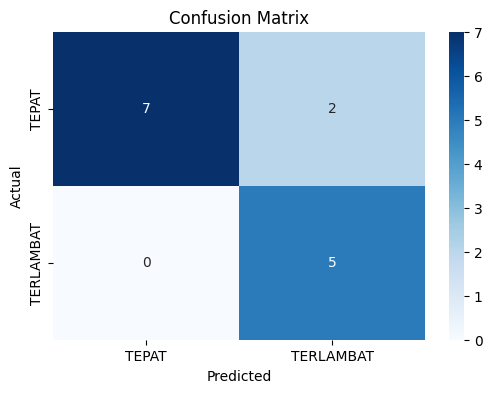

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Tampilkan confusion matrix sebagai heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=label_encoders['STATUS KELULUSAN'].classes_,
            yticklabels=label_encoders['STATUS KELULUSAN'].classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
import pandas as pd

# Buat dictionary dari classification report
report_dict = classification_report(
    y_test,
    y_pred,
    target_names=label_encoders['STATUS KELULUSAN'].classes_,
    output_dict=True
)

# Ubah ke DataFrame
report_df = pd.DataFrame(report_dict).transpose()

# Bulatkan angka ke dua desimal
report_df = report_df.round(2)

# Tampilkan
report_df


,precision,recall,f1-score,support
TEPAT,1.00,0.78,0.88,9.00
TERLAMBAT,0.71,1.00,0.83,5.00
accuracy,0.86,0.86,0.86,0.86
macro avg,0.86,0.89,0.85,14.00
weighted avg,0.90,0.86,0.86,14.00


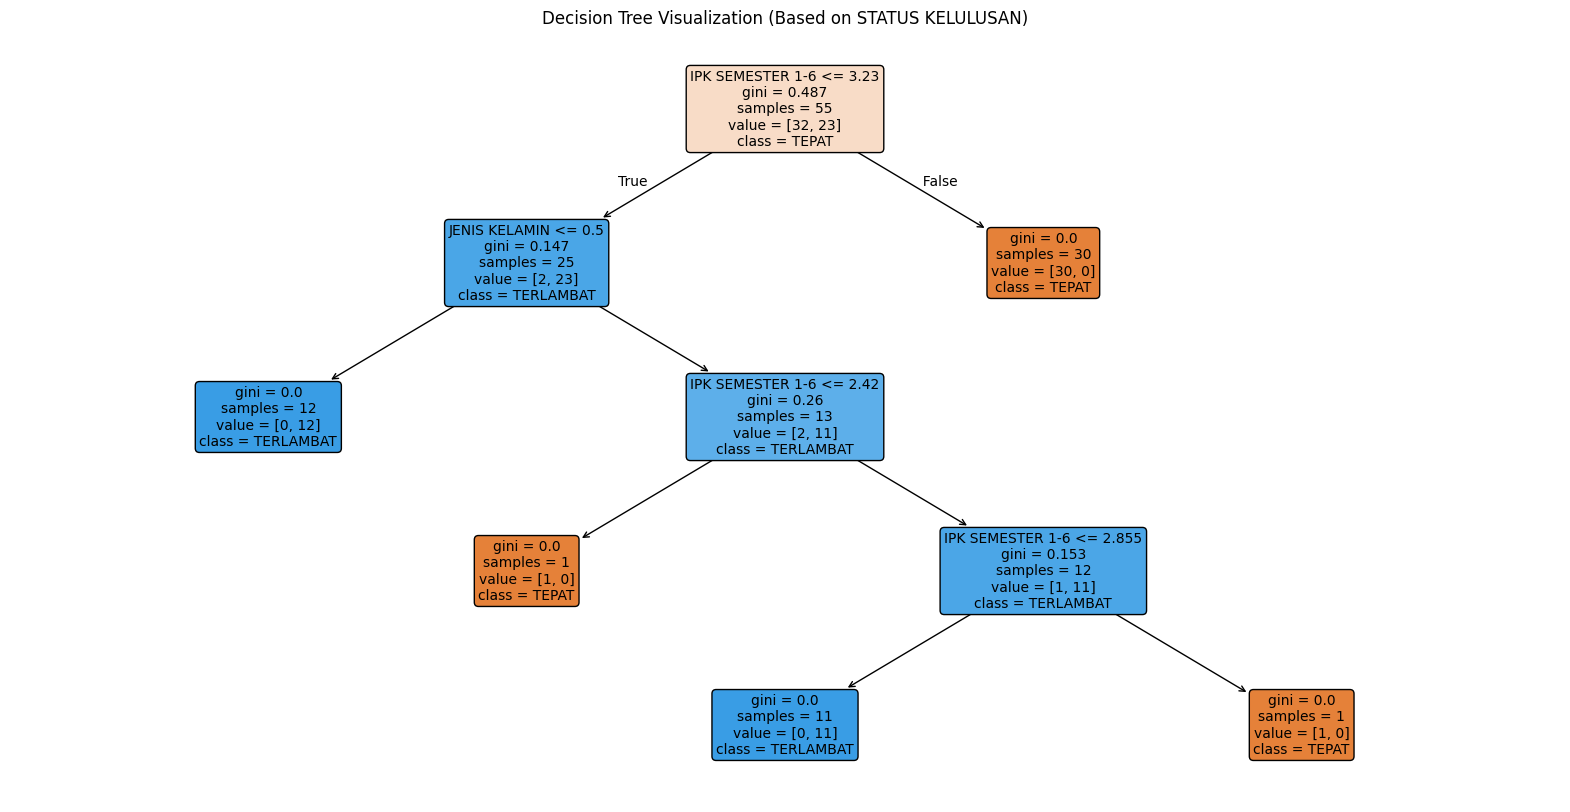

In [ ]:
# prompt: BUATKAN SAYA kodingan untuk membuat tree dari decision tree dari berdasrkan kolom STATUS KELULUSAN

from sklearn.tree import plot_tree
# Visualisasi Decision Tree
plt.figure(figsize=(20,10))
plot_tree(model,
          feature_names=X.columns,
          class_names=label_encoders['STATUS KELULUSAN'].classes_,
          filled=True,
          rounded=True,
          fontsize=10)
plt.title("Decision Tree Visualization (Based on STATUS KELULUSAN)")
plt.show()
